In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
import warnings

warnings.filterwarnings('ignore')

# Load data
file_path = 'insurance.csv'  # Update this if the file name is different
df = pd.read_csv(file_path)
df = df.dropna()

# General information
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Data distribution analysis


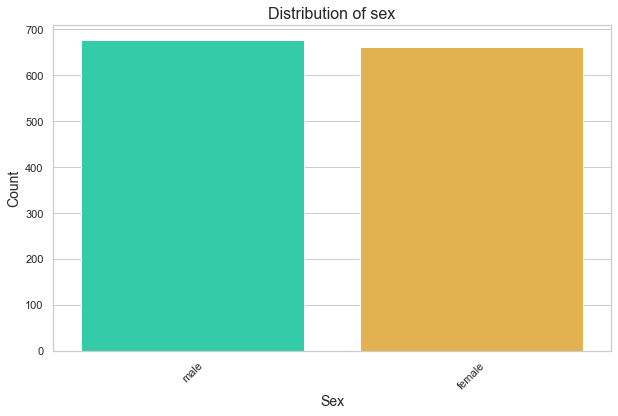

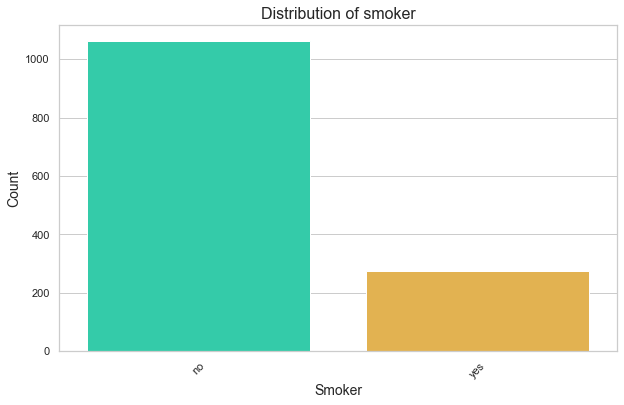

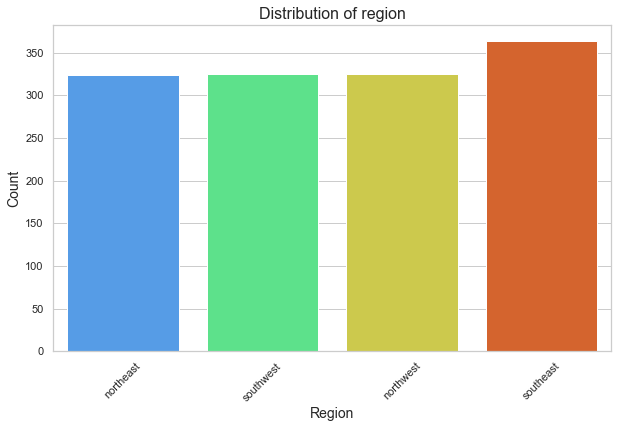

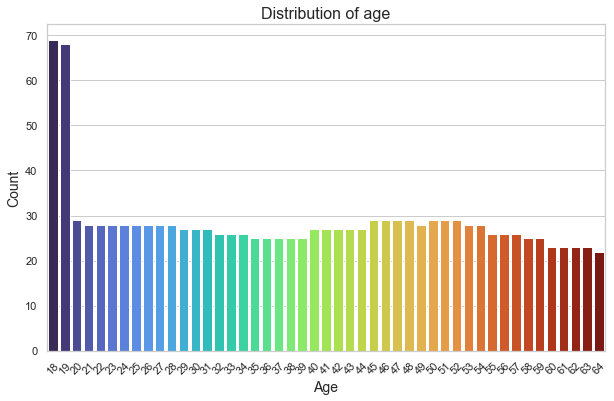

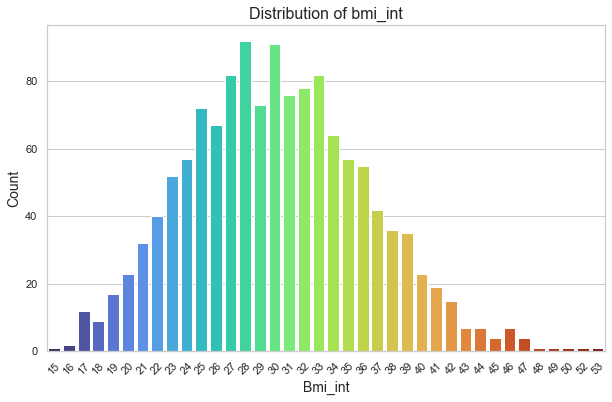

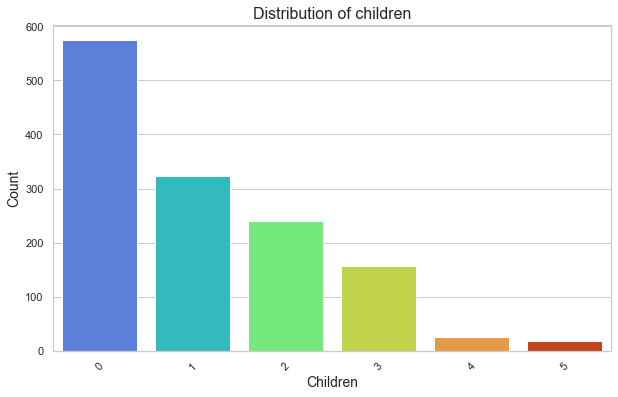

In [8]:
df['bmi_int'] = df['bmi'].apply(lambda x: int(x))
variables = ['sex', 'smoker', 'region', 'age', 'bmi_int', 'children']

# Data distribution analysis
print('Data distribution analysis')
for v in variables:
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look
    sns.countplot(x=v, data=df, palette="turbo")  # Use the viridis color palette

    plt.title(f'Distribution of {v}', fontsize=16)  # Add a title with larger font size
    plt.xlabel(v.capitalize(), fontsize=14)  # Capitalize the x-axis label
    plt.ylabel('Count', fontsize=14)  # Customize the y-axis label

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()

Variables pairplot:


<Figure size 1080x720 with 0 Axes>

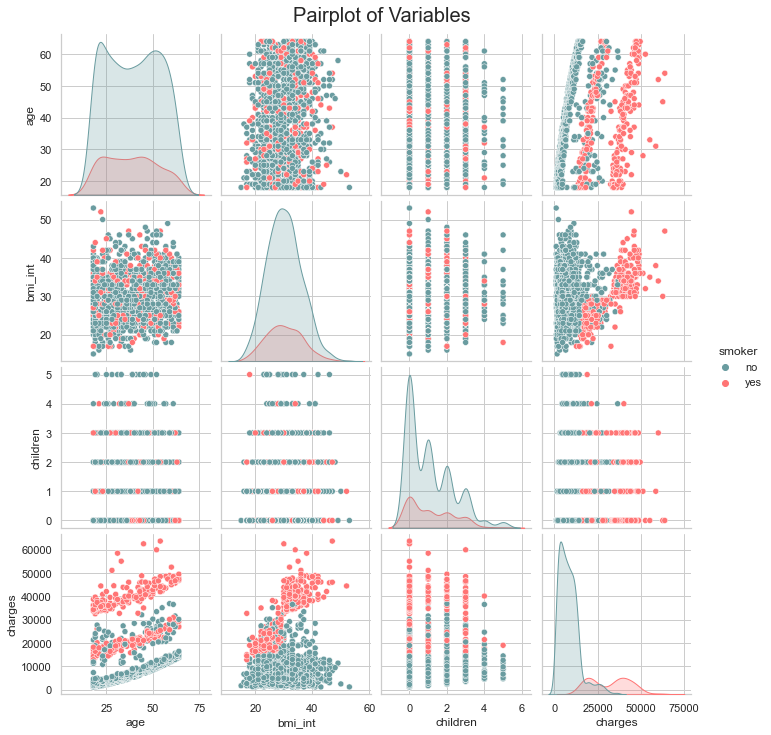

In [14]:
# Variables pairplot with updated color scheme for smokers
print('Variables pairplot:')
variables = ['sex', 'smoker', 'region', 'age', 'bmi_int', 'children', 'charges']

# Set a custom color palette for better distinction between categories
custom_palette = {'yes': '#FF7575', 'no': '#6A9CA0'}

# Adjust the style and size of the pairplot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Use scatter plots for numerical variables and kde plots for distributions
sns.pairplot(df[variables], kind='scatter', diag_kind='kde', hue='smoker', palette=custom_palette)

# Add a title
plt.suptitle('Pairplot of Variables', y=1.02, fontsize=20)

plt.show()

In [15]:
print('Model training and evaluating\n\n')
#transform categorical data
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

variables = ['sex','smoker','region','age','bmi','children']

X = df[variables]
sc = StandardScaler()
X = sc.fit_transform(X) 
Y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#train model
regressor = ExtraTreesRegressor(n_estimators = 200)
regressor.fit(X_train,y_train)

#prediction and evaluation
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('ExtraTreesRegressor evaluating result:')
print("Train MAE: ", sklearn.metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Model training and evaluating


ExtraTreesRegressor evaluating result:
Train MAE:  17.88913537386242
Train RMSE:  413.77689999135333
Test MAE:  2721.4623066291056
Test RMSE:  5131.174791406951


Feature importance ranking


1.smoker(0.613314)
2.bmi(0.192412)
3.age(0.134034)
4.region(0.025022)
5.children(0.024038)
6.sex(0.011181)


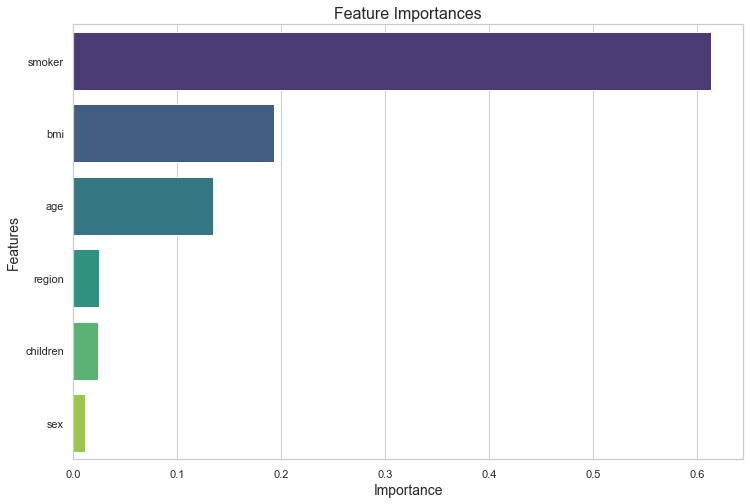

In [17]:
print('Feature importance ranking\n\n')
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest with improved aesthetics
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=importance_list, palette="viridis")

plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)

plt.show()

In [27]:
#PREDICTING NEW DATA

print('Predicting on new data\n\n')

# Data for Zukko
zukko = ['male','yes','southeast',25,30.5,2]
print('Zukko - ',str(zukko))

# Transform categorical variables
zukko[0] = le_sex.transform([zukko[0]])[0] 
zukko[1] = le_smoker.transform([zukko[1]])[0] 
zukko[2] = le_region.transform([zukko[2]])[0] 

X = sc.transform([zukko])

cost_for_zukko = regressor.predict(X)[0]
print('Cost for Zukko = ',cost_for_zukko,'\n\n')

# Data for Azula
Azula = ['female','no','southeast',45,19,0]
print(' Azula - ',str (Azula))

# Transform categorical variables
Azula[0] = le_sex.transform([Azula[0]])[0] 
Azula[1] = le_smoker.transform([Azula[1]])[0] 
Azula[2] = le_region.transform([Azula[2]])[0] 

X = sc.transform([dennis])

cost_for_azula = regressor.predict(X)[0]

print('Cost for Azula = ',cost_for_azula)

Predicting on new data


Zukko -  ['male', 'yes', 'southeast', 25, 30.5, 2]
Cost for Zukko =  34180.63867694997 


 Azula -  ['female', 'no', 'southeast', 45, 19, 0]
Cost for Azula =  15988.755638899987
